### Import

In [2]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import feature_selection 
from sklearn import preprocessing
from sklearn import metrics
from sklearn import neighbors
from sklearn import svm
from sklearn import decomposition
from sklearn.decomposition import PCA
from matplotlib import pyplot
from sklearn.feature_selection import SelectKBest, f_classif


### Load data

In [3]:
def load_data():
    # this_directory = os.path.dirname(os.path.abspath(__file__))
    data = pd.read_csv(os.path.join('hn', 'HN_radiomicFeatures.csv'), index_col=0)

    return data

data = load_data()
label = data["label"]
data = data.drop(["label"], axis=1)
feature_names = data.columns.values
print(feature_names)
print(f'The number of samples: {len(data.index)}')
print(f'The number of columns: {len(data.columns)}')


['hf_energy' 'hf_entropy' 'hf_kurtosis' 'hf_max' 'hf_mean' 'hf_median'
 'hf_min' 'hf_peak' 'hf_quartile_range' 'hf_range' 'hf_skewness' 'hf_std'
 'of_theta_x' 'of_theta_y' 'of_theta_z' 'sf_compactness_avg_2D'
 'sf_compactness_std_2D' 'sf_convexity_avg_2D' 'sf_convexity_std_2D'
 'sf_cvar_avg_2D' 'sf_cvar_std_2D' 'sf_evar_avg_2D' 'sf_evar_std_2D'
 'sf_prax_avg_2D' 'sf_prax_std_2D' 'sf_rad_dist_avg_2D'
 'sf_rad_dist_std_2D' 'sf_roughness_avg_2D' 'sf_roughness_std_2D'
 'sf_solidity_avg_2D' 'sf_solidity_std_2D' 'sf_volume_2D'
 'tf_GLRLM_GrayLevelNonUniformity'
 'tf_GLRLM_GrayLevelNonUniformityNormalized' 'tf_GLRLM_GrayLevelVariance'
 'tf_GLRLM_HighGrayLevelRunEmphasis' 'tf_GLRLM_LongRunEmphasis'
 'tf_GLRLM_LongRunHighGrayLevelEmphasis'
 'tf_GLRLM_LongRunLowGrayLevelEmphasis' 'tf_GLRLM_LowGrayLevelRunEmphasis'
 'tf_GLRLM_RunEntropy' 'tf_GLRLM_RunLengthNonUniformity'
 'tf_GLRLM_RunLengthNonUniformityNormalized' 'tf_GLRLM_RunPercentage'
 'tf_GLRLM_RunVariance' 'tf_GLRLM_ShortRunEmphasis'
 'tf_

### Check for missing data

In [4]:
# Detect missing values in dataframe
data.isnull().values.any()

False

### Exclude features with zero variance

In [5]:
# exclude features with zero variances
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
selector.fit_transform(data)
selector.fit_transform(data).shape

(113, 157)

### Data split

In [6]:
train_data, test_data, train_label, test_label = train_test_split(data, label, train_size=0.8)
# train_data, val_data, train_label, val_label = train_test_split(train_val_data, train_val_label, train_size=0.85)

print(f'The number of train samples: {train_data.shape[0]}')
# print(f'The number of validation samples: {val_data.shape[0]}')
print(f'The number of test samples: {test_data.shape[0]}')

The number of train samples: 90
The number of test samples: 23


### Scaling train data

In [27]:
scaler = StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)
train_data = pd.DataFrame(train_data, columns=feature_names)
test_data = pd.DataFrame(test_data, columns=feature_names)

0    -0.097680
1     0.276961
2    -0.383909
3    -0.600939
4    -0.539403
        ...   
85   -0.535935
86   -0.095518
87    0.515404
88   -0.517783
89   -0.589275
Name: sf_volume_2D, Length: 90, dtype: float64


### Scaler & Linear Classifier

In [8]:
clf = SGDClassifier()
clf.fit(train_data, train_label)
print(np.shape(clf.coef_))
print(clf.intercept_)

label_train_pred = clf.predict(train_data)
print(metrics.accuracy_score(train_label, label_train_pred))

y_pred = clf.predict(test_data)
print(metrics.accuracy_score(test_label, y_pred))

(1, 159)
[-45.68557735]
0.9888888888888889
0.7391304347826086


### kNN classifier

In [9]:
# Perform a PCA
pca = decomposition.PCA(n_components=10)
pca.fit(train_data)
train_pca = pca.transform(train_data)
test_pca = pca.transform(test_data)
print(sum(pca.explained_variance_ratio_))

# Fit kNN
knn = neighbors.KNeighborsClassifier(n_neighbors=10)
knn.fit(train_pca, train_label)
score_train = knn.score(train_pca, train_label)
score_test = knn.score(test_pca, test_label)

# Print result
print(f"Training result: {score_train}")
print(f"Test result: {score_test}")

0.7145868609885844
Training result: 0.7777777777777778
Test result: 0.782608695652174


C:\Users\velde\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [145 146 147] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\velde\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


range(0, 159)
                                               score  rank
tf_GLRLM_RunEntropy                        40.758736     0
tf_GLRLM_RunPercentage                     34.139581     1
tf_GLRLM_RunLengthNonUniformityNormalized  30.128823     2
tf_Gabor_0.5A2.36skew                      26.192377     3
sf_rad_dist_avg_2D                         25.363677     4
...                                              ...   ...
tf_GLRLM_ShortRunHighGrayLevelEmphasis      0.000713   154
tf_NGTDM_Strength                           0.000020   155
tf_LBP_peak_R15_P36                              NaN   156
tf_LBP_peak_R3_P12                               NaN   157
tf_LBP_peak_R8_P24                               NaN   158

[159 rows x 2 columns]
                  score  rank
sf_volume_2D  10.617601    25


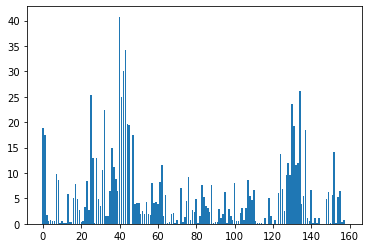

In [50]:
# You can understand the F-Scores as a measure of how informative each feature is for your dataset.
# As it is explained in the method documentation, an F-test is carried out to assess each feature. 
# The F-scores are the test statistic for the F-test, and they basically represent the ratio between the explained and the unexplained variance.

fs = SelectKBest(score_func=f_classif, k='all')
fs.fit(train_data, train_label)
scores = np.zeros(len(fs.scores_))

for i in range(len(fs.scores_)):
	# print('Feature %d: %f' % (i, fs.scores_[i]))
	scores[i] = fs.scores_[i]

rank = range(len(scores))

scores = pd.DataFrame(scores, columns=["score"], index=feature_names)
scores = scores.sort_values(by=["score"], ascending=False)
scores["rank"] = rank

volume = scores.loc[["sf_volume_2D"]]
print(volume)

pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

### Find average accuracy over multiple classifications

In [ ]:
# Find mean accuracy for 10 kNN classifications
loops = 100
score_train = np.zeros(loops)
score_test = np.zeros(loops)

for i in range(loops):
    train_data, test_data, train_label, test_label = train_test_split(data, label, train_size=0.8)
    scaler = StandardScaler().fit(train_data)
    train_data = scaler.transform(train_data)
    test_data = scaler.transform(test_data)

    # Perform a PCA
    pca = decomposition.PCA(n_components=10)
    pca.fit(train_data)
    train_pca = pca.transform(train_data)
    test_pca = pca.transform(test_data)

    # Fit kNN
    knn = neighbors.KNeighborsClassifier(n_neighbors=10)
    knn.fit(train_pca, train_label)
    score_train[i] = knn.score(train_pca, train_label)
    score_test[i] = knn.score(test_pca, test_label)

mean_score_train = np.mean(score_train)
mean_score_test = np.mean(score_test)
print(score_train)
print(score_test)
print(f"Mean training score: {mean_score_train}")
print(f"Mean test score: {mean_score_test}")